<a href="https://colab.research.google.com/github/marpulli246/VaasaUniversity-AML/blob/main/Exercises/Markku_Pulli_Exercise6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applied Machine Learning (2021), exercises


## General instructions for all exercises

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Follow the instructions and fill in your solution under the line marked by tag

> YOUR CODE HERE

Do not change other areas of the document, since it may disturb the autograding of your results!
  
Having written the answer, execute the code cell by and pressing `Shift-Enter` key combination. The code is run, and it may print some information under the code cell. The focus automatically moves to the next cell and you may "execute" that cell by pressing `Shift-Enter` again, until you have reached the code cell which tests your solution. Execute that and follow the feedback. Usually it either says that the solution seems acceptable, or reports some errors. You can go back to your solution, modify it and repeat everything until you are satisfied. Then proceed to the next task.
   
Repeat the process for all tasks.

The notebook may also contain manually graded answers. Write your manualle graded answer under the line marked by tag:

> YOUR ANSWER HERE

Manually graded tasks may be text, pseudocode, or mathematical formulas. You can write formulas with $\LaTeX$-syntax by enclosing the formula with dollar signs (`$`), for example `$f(x)=2 \pi / \alpha$`, will produce $f(x)=2 \pi / \alpha$

When you have passed the tests in the notebook, and you are ready to submit your solutions, download the whole notebook, using menu `File -> Download as -> Notebook (.ipynb)`. Save the file in your hard disk, and submit it in [Moodle](https://moodle.uwasa.fi) under the corresponding excercise.

Your solution should be an executable Python code. Use the code already existing as an example of Python programing and read more from the numerous Python programming material from the Internet if necessary. 


In [ ]:
NAME = "Markku Pulli"
Student_number = "121763"

---

## Wine quality determination (Regression)
A chemical analysis was carried out for 1599 red wine samples, after which the quality of each sample was analyzed by experts in scale 0..10.

The chemical analaysis reveals 11 features for each wine sample, which are:
fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol (concentration). Each feature is a floating point value, and the quality is an integer between 0 to 10.  


## Task 1


### Read the data

- Read a CSV-file, called `winequality-red.csv`
- Separate 11 first columns and all rows to your design matrix X
- Use the last column, quality, as dependent variable (target)


### Make training set and test set
Separate your data X and y to training set (X_train, y_train) which contains 75% of the data and to the test set X_test, y_test which contains 25% of the data.

In [1]:
##>>> Some code for bootstrap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

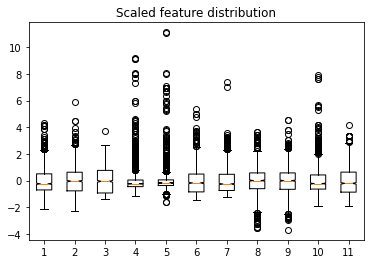

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('/content/winequality-red.csv')
X = df.drop('quality',axis=1)
target = df['quality']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, target, test_size=0.25, random_state=42)
plt.boxplot(X_scaled,notch=True)
plt.title('Scaled feature distribution')
plt.show()
pd.DataFrame(X).describe()
# Few potential outliers. These can impact model accuracy. Could use 1.5 IQR rule to identify and eliminate them.

In [4]:
## >> Some tests, do not change
assert(X_train.shape==(1199,11))
assert(X_test.shape==(400,11))

## Task 2

- Study the data, select a regression algorithm for predicting the quality of the wine, based on it's chemical features. You can assume that the quality is a floating point number.
- Train the regression algorithm using the training data.
- Use cross validation to test the performance of the regressor and tune it's parameters as good as you can
- Finally test the regressor with the test set
- Report the score (= $R^2$ = coefficient of determination) of the regressor in the training set, cross validation and in the test set
- Plot the predicted quality against the known quality 
- What does the $R^2$ score tells? 
- What is your opinion of the performance? Is there signs of overfitting?

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:289: ConvergenceWarning: Solver terminated early (max_it

tuned hyperparameters: {'C': 4, 'gamma': 'scale', 'kernel': 'rbf', 'tol': 0.001}
Accurary in the training set..0.743953
Accurary in crossvalidation...0.626402
Accurary in the test set......0.612500


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


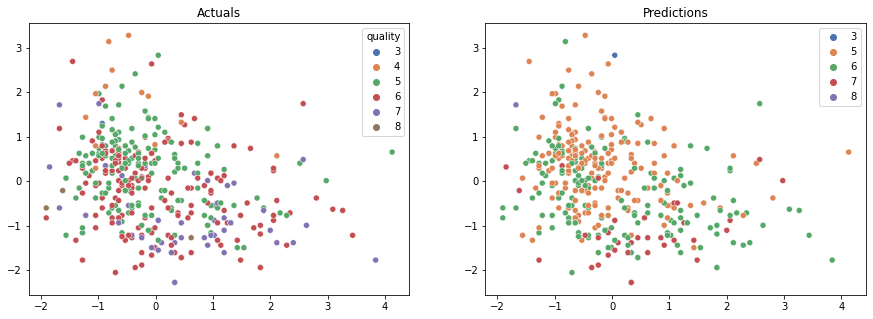

In [5]:
#This time let's use kernel SVM and tune parameters 
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import sklearn.metrics as metrics
import seaborn as sns

#Find Optimal parameters
grid={"kernel":['poly','rbf','sigmoid'], 
      "gamma":['auto','scale',0.05,10,20],
      "C":[0.05,0.5,1,2,4],
      "tol":[0.001, 0.0001, 0.00001]
      }
svm=svm.SVC(max_iter=10000, verbose=0)
svm_cv=GridSearchCV(svm,grid, cv=5)
svm_cv.fit(X_train, y_train)

print("tuned hyperparameters:",svm_cv.best_params_)

from sklearn import svm
#Let's use tuned parameters for train and test data

svm_f = svm.SVC(C=4, gamma='scale', kernel='rbf', tol=0.001, max_iter=10000)
svm_f.fit(X_train,y_train)
train_score = metrics.accuracy_score(y_train, svm_f.predict(X_train))
cv_score = cross_val_score(svm_f, X_train, y_train, cv=5).mean()
test_score = metrics.accuracy_score(y_test, svm_f.predict(X_test))

print("Accurary in the training set..%f" % train_score)
print("Accurary in crossvalidation...%f" % cv_score)
print("Accurary in the test set......%f" % test_score)

#Accurary in the training set..0.743953
#Accurary in crossvalidation...0.626402
#Accurary in the test set......0.612500

#Accuracy is low on training data but still higher than test data. So this means model is slightly overfitting.
#With more time score can be improved. 

#Let's create graphical presentation.
preds = svm_f.predict(X_test)
f, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].set_title('Actuals')
axs[1].set_title('Predictions')

#Let's take first two features and create scatter plots
sns.scatterplot(X_test[:,0], X_test[:,1], hue=y_test, palette="deep", ax=axs[0])
sns.scatterplot(X_test[:,0], X_test[:,1], hue=preds, palette="deep", ax=axs[1])

In [6]:
### >>>> Some testing
# The coefficient of determination should be between 0.4 - 0.5 in the
# test set depending on your regression algorithm and parameters
assert(test_score>0.4), "Try again, if you can get better accuracy by tuning the regressor parameters"

## Task 3, Select the best features

Like it often is, some features are more important for regression than the others. 

- Study which features are the most important for predicting the quality. If you used Extratrees regressor or GradientBoostedTree regressor, then you can use the .feature_importances vector. Another option is to use LASSO or Elastic net models and SelectFromModel to reduce unimportant features.
- Plot a bar graph or stem plot to visualize the importance of features
- To check the importance of a single variable, plot a scatter plot using true quality in x-axis and the value of teh most important variable in y-axis.
- Make a vector `features` which contains the names of the three most important features in decreasing order

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


CV score.......... 0.37709455255243646
Training score.... 0.6348780550018278
 0 fixed acidity= 0.05
 1 volatile acidity= 0.12
 2 citric acid= 0.02
 3 residual sugar= 0.04
 4 chlorides= 0.04
 5 free sulfur dioxide= 0.01
 6 total sulfur dioxide= 0.07
 7  density= 0.04
 8       pH= 0.04
 9 sulphates= 0.18
10  alcohol= 0.39


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


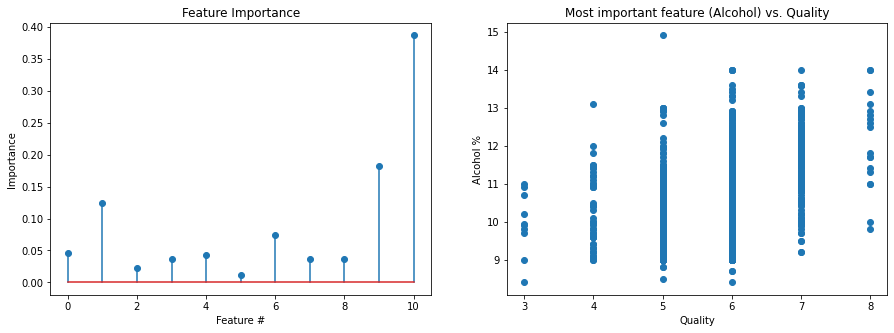

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

#Let's use GradientBoostingRegression for feature importance validation as SVM kernel does not have option to check it due to algorithm.
features=[]

est = GradientBoostingRegressor(max_features=11)
est.fit(X_train, y_train)
yhat=est.predict(X)
RsquaredCV=cross_val_score(est, X_train, y_train, cv=5).mean()
RsquaredTR=est.score(X_train,y_train)
print("CV score..........", RsquaredCV)
print("Training score....", RsquaredTR)

# Plot the importance of each feature
f, axs = plt.subplots(1, 2, figsize=(15, 5))
axs[0].set_title('Feature Importance')
axs[0].set_xlabel('Feature #')
axs[0].set_ylabel('Importance')
axs[0].stem(est.feature_importances_)
i=range(len(X.columns))
for i in range(len(X.columns)):
    print("%2d %8s=%5.2f" % (i,X.columns[i], est.feature_importances_[i]))
    if est.feature_importances_[i]>0.10:
      features.append(X.columns[i])

#Most important feaure is alcohol
axs[1].set_title('Most important feature (Alcohol) vs. Quality')
axs[1].set_xlabel('Quality')
axs[1].set_ylabel('Alcohol %')
axs[1].scatter(target,X['alcohol'])    

In [8]:
assert(len(features)==3), "Please put the names of three most important features in list features!"
